## <머신러닝에서 사용되는 모델>

    - 지도 학습
        
        -- 정형데이터
            
            --- 연속형 데이터 

                --- 회귀모델 사용

                    [회귀모델 종류]

                    * 단일회귀모델

                    * 다항회귀모델
                    
                    * 다중회귀모델
                    
                    * 릿지
                    
                    * 라쏘
                    
                    * k-최근접 이웃 모델
                    
                    * 앙상블 회귀모델

                        - 랜덤포레스트, 엑스트라 트리, 그레디언트부스팅, 히스토그램 그레디언트부스팅
            
            --- 범주형 데이터 

                ---- 분류모델 사용
                
                    [분류모델 사용]

                    * 로지스틱 회귀모델
                    
                    * k-최근접 이웃 회귀모델
                    
                    * 결정 트리
                    
                    * 앙상블 분류 모델

                        - 랜덤포레스트, 엑스트라 트리, 그레디언트부스팅, 히스토그램 그레디언트부스팅, xgboost


    - 비지도학습
        
        -- 비정형데이터

            --- 영상, 음성, 문서
            
                --- [군집모델 종류]

                    * K-Means(K-평균) 군집모델

                
                

### <생선 구분하기>

- 특성(컬럼) : 생선이름, 생선길이, 생선 무게

- 길이와 무게로 생선이름 맞추기

- 독립변수(x) = 길이, 무게

- 종속변수(y) =  생선이름(도미와 빙어 구분하기)

- 종속변수가 범주형 데이터, 즉 분류하는 모델 적용

### <훈련모델 처리 순서>

1. 데이터 수집

2. 데이터 전처리 : 표준화(정규화) -> 특성(컬럼)들간의 데이터의 단위(scale)가 다른 경우 일정한 크기로 맞춰주는 처

3. 데이터 분류 : 훈련/테스트(7:3 or 7.5:2.5 or 8:2) 또는 훈련/검증/테스트(6:2:2)로 데이터 분류

4. 모델 생성 : 모델은 클래스 객체로 라이브러리화 되어 있음(모델 생성이라는 의미는 클래스 생성을 의미함)

5. 모델 훈련(fit)

6. 모델 평가

7. 모델 튜닝(하이퍼파라미터 튜닝) : 하이퍼파라미터를 속성들이라고 생각하면 됨

8. 5~7번 반복

9. 모델 선정 : 분류모델 전체를 훈련 후 평가 결과가 가장 좋은 모델을 선정함

10. 선정 모델로 최종 테스트(predict)

In [1]:
### 데이터 불러들이기

# - 도미의 길이와 무게 데이터

# 도미 길이(cm)
bream_length= [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

# 도미 무게(g)
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [2]:
### 도미의 길이와 무게의 데이터 길이 확인하기

print('bream_length :',len(bream_length))
print('bream_weight :',len(bream_weight))

bream_length : 35
bream_weight : 35


In [3]:
### 데이터 분포 확인하기

In [4]:
### 시각화 라이브러리

import matplotlib.pyplot as plt
%matplotlib inline

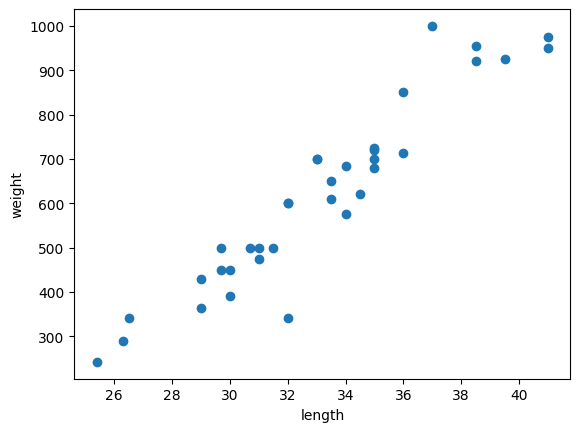

In [5]:
# 도미 데이터 산점도 그래프 그리기 : scatter()

plt.scatter(bream_length,bream_weight)

# - x축 이름
plt.xlabel('length')

# - y축 이름
plt.ylabel('weight')

# - 그래프 보여줘~
plt.show()

#### 해석

- length가 증가하면 weight가 증가하는 특징을 가지고 있음

- 산점도의 분포 방향은 양 (+)의 방향을 띄고 있음(이를 양의 상관관계라고 한다).

- 양(+)의 상관관계를 띄는 우상향 분포를 나타내고 있음
 
- 우상향 형태의 선형 형태을 띄고 있음

In [6]:
### 빙어 데이터 불러오기

# 빙어 길이

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

#빙어 무게 

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
### 길이와 무게 각 데이터의 갯수 확인하기 

len(smelt_length),len(smelt_weight)

(14, 14)

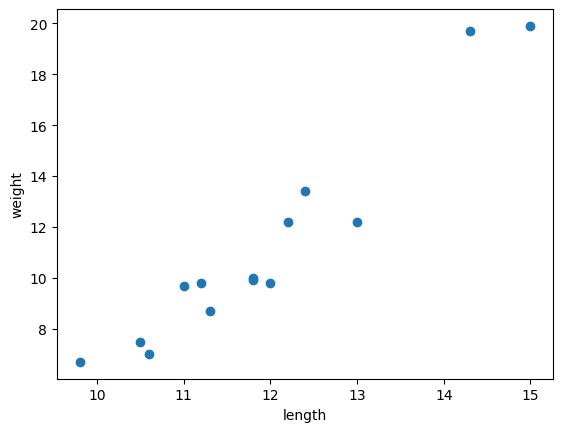

In [8]:
# 빙어 데이터 산점도 그래프 그리기 : scatter()

plt.scatter(smelt_length,smelt_weight)

# - x축 이름
plt.xlabel('length')

# - y축 이름
plt.ylabel('weight')

# - 그래프 보여줘~
plt.show()

#### 해석

- length가 증가하면 weight가 증가하는 특징을 가지고 있음

- 산점도의 분포 방향은 양 (+)의 방향을 띄고 있음(이를 양의 상관관계라고 한다).

- 양(+)의 상관관계를 띄는 우상향 분포를 나타내고 있음
 
- 우상향 형태의 선형 형태을 띄고 있음

- 13cm 기준으로 값이 떨어짐(이상치)

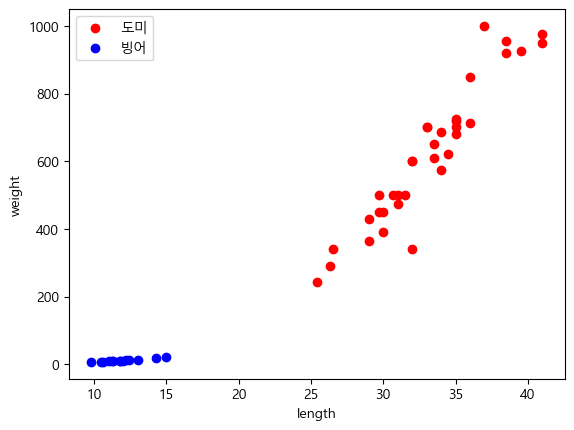

In [9]:
### 도미와 빙어 데이터를 하나의 산점도 그래프로 그리기

# - 도미는 빨강색으로 표시, 빙어는 파랑색으로 표시

plt.rc('font', family='Malgun Gothic') 
plt.scatter(bream_length,bream_weight,c='red',label='도미')
plt.scatter(smelt_length,smelt_weight,c='blue',label='빙어')

# - x축 이름
plt.xlabel('length')

# - y축 이름
plt.ylabel('weight')

# - 범례 표시하기
plt.legend(loc='best')

# - 그래프 보여줘~
plt.show();

#### 해석

- 도미와 빙어는 모두 우상향 분포를 나타내고 있음

- 도미의 경우 경사가 급한 반면, 빙어의 경우에는 경사(기울기)가 완만한 분포를 보이고 있음

### 생선 분류하기; 분류모델 적용 -> 도미와 빙어 분류하기

#### <KNN 분류모델 사용>

- K최근접이웃 모델이라고 칭한다.

- 머신러닝에서 가장 간단한 모델로 처음에 비교용으로 주로 사용되는 모델임

- 실제 서비스용으로 사용하기에는 성능이 약한 모델임

#### <KNN 처리방식>

- 분류하고자 하는 값과 가장 가까운 이웃 갯수의 비율(또는 평균)을 이용

- 비율이 가장 많은 쪽(다수결의 원칙을 따름)으로 판단하여 분류하는 방식임

- 분류하고자 하는 값과 가장 가까운 이웃들을 K라고 한다.

- k의 값은 분류시 기준이 되는 이웃의 갯수를 의미한다.

- k값은 홀수값으로 지정해야 하며, 3이상의 값을 사용한다.

##### <훈련에 사용할 데이터>

- x(독립변수) : 길이, 무게

- y(종속변수) : 이름

- 독립변수 도미와 빙어 데이터를 하나로 통합해야 함

- 종속변수는 생성해야 함

In [10]:
### 데이터 통합하기
# - 도미와 빙어의 길이 데이터 합치기

length = bream_length + smelt_length

# - 도미와 빙어의 무게 데이터 합치기

weight = bream_weight + smelt_weight


len(length),len(weight)

(49, 49)

In [11]:
print(length,'\n\n',weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 

 [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


#### <머신러닝에서 사용하는 차원>

- 독립변수 : 2차원
           : [[길이,무게],[길이,무게],[길이,무게],...,[],[]]

- 종속변수 : 1차원
            [이름,이름,이름,...,이]

In [12]:
# 2차원 만들기 1
fish_data = [[l,w] for l,w in zip(length,weight)]
len(fish_data)

# 2차원 만들기 2
#fish_data = []
#for i in range(0,len(lenth),1):
#    fish_data.append([length[i],weight[i]])

49

#### <종속변수 데이터 생성하기>

- 1차원으로 만들어야 한다.

- 49개의 이름을 독립 변수의 인덱스 위치의 이름과 동일하게 만들어야 한다.

- 머신러닝에서는 숫자값을 사용한다.

- 도미는 1로, 빙어는 0으로 생성

- 이진 분류 : 0과 1의 값을 사용

- 다중 분류 : 0 ~ n의 값을 사용

In [13]:
### 도미와 빙어의 갯수 확인하기
len(bream_length),len(smelt_length)

(35, 14)

In [14]:
fish_target =[]
for i in range(0,len(length)):
    if i<=34:
        fish_target.append(1)
    else:
        fish_target.append(0)
len(fish_target)

49

### <모델 생성하기>

- 사용하는 모델 : KNeighbors의 분류 모델 -> KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

#### 모델 훈련시키기

- 지도학습인 경우 : fit(독립변수, 종속변수)

- 비지도학습인 경우 : fit(독립변수)

In [17]:
### 모델이 알아서 패턴을 찾는 훈련을 수행한다.
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

#### 정확도 확인하기

- 분류에서 정확도는 score(독립변수, 종속변수) 함수 사용

In [18]:
### 분류 정확도
kn.score(fish_data,fish_target)

1.0

#### 해석

- 분류에서 정확도 범위 : 0 ~ 1 (0% ~ 100%) 사이의 값이 출력됨

- 1에 가까울수록 정확도가 높다고 판단한다.

- 즉, 성능이 좋은 훈련 모델이라고 판단

In [19]:
### 임의 데이터를 이용해서 분류해보기(테스트)
# - 예측함수 : predict(임의 독립변수) 사용
kn.predict([[30,600]])

array([1])

#### 해석

- 출력 결과값이 "종속변수" 값, 예측값(분류값)이라고 칭한다.

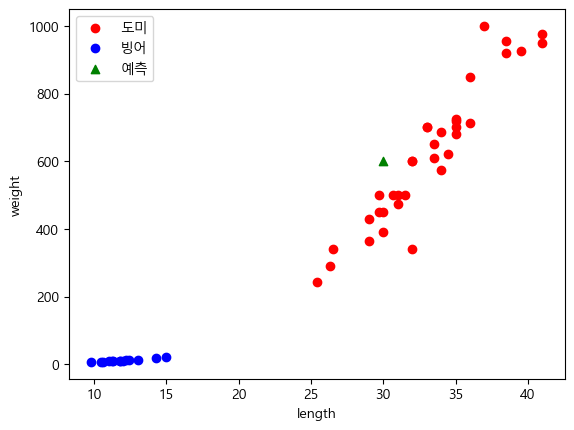

In [20]:
plt.scatter(bream_length,bream_weight,c='red',label='도미')
plt.scatter(smelt_length,smelt_weight,c='blue',label='빙어')
plt.scatter(30,600, c='green', marker='^',label='예측')

# - x축 이름
plt.xlabel('length')

# - y축 이름
plt.ylabel('weight')

# - 범례 표시하기
plt.legend(loc='best')

plt.show();

#### 해석

- 임의의 예측 데이터가 위치한 곳의 이웃의 갯수를 확인

- 비율이 높은 쪽의 이름을 분류하게 됨

- K(이웃의 갯수)는 기본(default)로 5개가 사용된다(지정 안할 경우).

### 하이퍼 파라미터 튜닝

- 모델 성능을 향상시키는 방법

- 과대적합 또는 과소적합이 일어난 경우 튜닝 진행

- 모델(클래스)의 속성(변수) 중에 사람이 직접 값을 지정해 주어야 하는 변수들을 통칭해서 하이퍼 파라미터라고 칭한다.

- 과대적합 : 정확도가 1인 경우 


In [21]:
### KNN 분류 모델 생성하기
# - n_neighbors : 이웃의 갯수 (하이퍼 파라미터)

kn21 = KNeighborsClassifier(n_neighbors=21)
kn21

KNeighborsClassifier(n_neighbors=21)

In [22]:
### KNN 분류모델 훈련시키기

kn21.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=21)

In [24]:
### 훈련모델 정확도 확인하기

kn21.score(fish_data,fish_target)

0.9795918367346939

#### 해석

- 도미와 빙어의 무게와 길이 데이터를 이용한 분류시 

- KNN 분류모델의 이웃의 갯수(k)를 21개를 사용하였을 때

- 정확도 0.98의 매우 우수한 모델로 판단된다.

In [25]:
### 임의 데이터 30cm, 600g을 분류하기

kn21.predict([[30,600]])

array([1])

#### 해석

- 임의 독립변수를 이용한 예측 결과는 1로 도미로 분류 되었음.



In [26]:
### 이웃의 갯수 41개를 이용하여, 훈련, 평가, 임의 데이터로 분류

kn41 = KNeighborsClassifier(n_neighbors=41)

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

0.7142857142857143

In [27]:
kn41.n_neighbors=41

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

0.7142857142857143

In [29]:
kn41.n_neighbors=15

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

1.0

In [30]:
kn41.n_neighbors=5

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

1.0

In [31]:
kn41.n_neighbors=21

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

0.9795918367346939

In [32]:
kn41.n_neighbors=17

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

1.0

In [33]:
kn41.n_neighbors=19

kn41.fit(fish_data,fish_target)

kn41.score(fish_data,fish_target)

0.9795918367346939

In [56]:
### 정확도가 1보다 작은 가장 좋은 정확도일 때의 이웃의 갯수 찾기

### 모델 생성
kn = KNeighborsClassifier()

### 훈련시키키
kn.fit(fish_data,fish_target)

### 가장 최적의 이웃을 찾는 로직
# 반복문의 범위 : 최소 3부터 최대 데이터의 갯수만큼
# 단, 최대 데이터의 갯수는 실제 모두 사용하는 경우는 없기에 1/2 정도의 갯수만 사용해도 된다.

# - 정확도가 가장 높을 때의 이웃의 갯수를 담을 변수
ncnt = 0

# - 정확도가 가장 높을 때의 정확도를 담을 변수
nscore = 0

for n in range(3,len(fish_data),2):
    kn.n_neighbors = n
    # - 이미 모델 객체가 생성되어 있는 경우는 score()만 가지고도 정확도 확인 가능하기에 fit은 생략 가능 -> score()함수 내에서도 fit을 자동 수행하고 있음
    kn.fit(fish_data,fish_target)
    score = kn.score(fish_data, fish_target)
    # print(n,score)
    # 1보다 작은 정확도인 경우만 처리
    if score < 1:
        # 담아놓은 nscore의 값이 현재 score보다 작은 경우에는 현재 score로 교체하기
        if nscore < score:
            nscore = score
            # 이때의 n(이웃의 갯수)를 ncnt 변수에 담아 놓기
            ncnt = n

print(f'ncnt={ncnt} / nscore={nscore}')

ncnt=19 / nscore=0.9795918367346939


In [52]:
b = []
for i in range(3,50,2):
    kn.n_neighbors = i
    kn.fit(fish_data,fish_target)
    a = kn.score(fish_data, fish_target)
    b.append([i,a])
b

[[3, 1.0],
 [5, 1.0],
 [7, 1.0],
 [9, 1.0],
 [11, 1.0],
 [13, 1.0],
 [15, 1.0],
 [17, 1.0],
 [19, 0.9795918367346939],
 [21, 0.9795918367346939],
 [23, 0.9795918367346939],
 [25, 0.9795918367346939],
 [27, 0.9795918367346939],
 [29, 0.7142857142857143],
 [31, 0.7142857142857143],
 [33, 0.7142857142857143],
 [35, 0.7142857142857143],
 [37, 0.7142857142857143],
 [39, 0.7142857142857143],
 [41, 0.7142857142857143],
 [43, 0.7142857142857143],
 [45, 0.7142857142857143],
 [47, 0.7142857142857143],
 [49, 0.7142857142857143]]

In [58]:
### 찾아낸 이웃의 갯수 변수를 이용해서 최종 테스트
kn.n_neighbors = 19
kn.score = (fish_data,fish_target)

kn.predict([[30,600]])

array([1])

### <모델 사용하는 부분>

--> 데이터 수집 및 정제하여 사용할 데이터 처리하는 작업 필요

1. 모델 클래스 생성

2. 모델 훈련시키기

3. 정확도 확인(평가)

--> 성능 향상을 위한 하이퍼 파라미터 튜닝

4. 예측(predict)

